# Homework 1 - Luka Radić
### SCIPER: 354502

## Import the libraries needed

In [182]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy
from scipy.stats import bernoulli
from scipy.optimize import minimize
from scipy.special import erfcinv

import warnings
warnings.filterwarnings('ignore')

## Exercise 1: First passage time of a one-dimensional Brownian particle

### Task 1:
Let us write the density of a single particle reaching the point at distance $d$ from the start at time $t$:
$$
p(t|d,D) = \frac{d}{\sqrt{4 \pi D t^3}} \; \text{exp}\left(-\frac{d^2}{4 D t}\right)
$$

The joint distribution of $n$ independent identically distributed random variables can be written as a product of individual particle densities:
$$
p\left(\{t_i\}_{i=1}^n|d,D\right) = \prod_{i=1}^n \; p(t_i|d, D) = \prod_{i=1}^n \frac{d}{\sqrt{4\pi D t_i^3}} \; \text{exp}\left(-\frac{d^2}{4 D t_i}\right)
$$

Finally, the above result can be rearranged so that the joint density has the following form:
$$
p\left(\{t_i\}_{i=1}^n|d,D\right) = \frac{d}{\sqrt{4\pi D}} \; \prod_{i=1}^n \frac{1}{\sqrt{t_i^3}} \text{exp} \left( -\frac{d^2}{4 D t_i} \right)
$$

As for the normalized log-likelihood, the final expression can easily be obtained using the standard logarithm properties of converting product to sum and exponent to multiplication:
\begin{align}
\mathcal{L}\left(\{t_i\}_{i=1}^n | d, D\right) &= \frac{1}{n} \; \text{log} \left( \frac{d}{\sqrt{4\pi D}} \; \prod_{i=1}^n \frac{1}{\sqrt{t_i^3}} \text{exp} \left( -\frac{d^2}{4 D t_i} \right) \right) \\
&= \frac{1}{n} \left[ \text{log}(d) - \frac{1}{2}\text{log}(4\pi D) - \frac{3}{2}\sum_{i=1}^n \text{log}(t_i) - \frac{d^2}{4D}\sum_{i=1}^n \frac{1}{t_i} \right]
\end{align}

### Task 2: Log-likelihood

First, we need to define the function `loglh` which calculates the log-likelihood of $N$ i.i.d. random variables $t_i$, following the formula for $\mathcal{L}\left(\{t_i\}_{i=1}^n | d, D\right)$ above. The only exception is that we do not normalize the log-likelihood with the factor $\frac{1}{n}$.

In [5]:
def loglh(d, D, t):
    logl = 0
    for i in t:
        logl += np.log( d/np.sqrt(4*np.pi*D*i**3) * np.exp(-d*d/(4*D*i)) )
    return logl

We define the true value of the parameters. I chose $D^*=4$.

In [6]:
d_true = 2
D_true = 4

For each $N\in\{10, 20, 100\}$, we generate the set of observations $\{t_i\}$. Then we compute and plot the log-likelihood for $D\in(0,10]$.

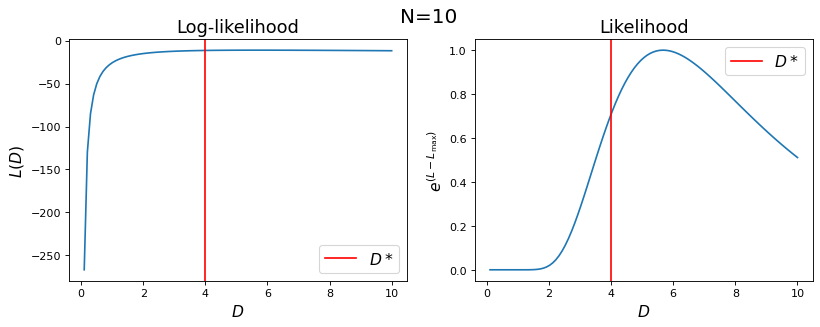

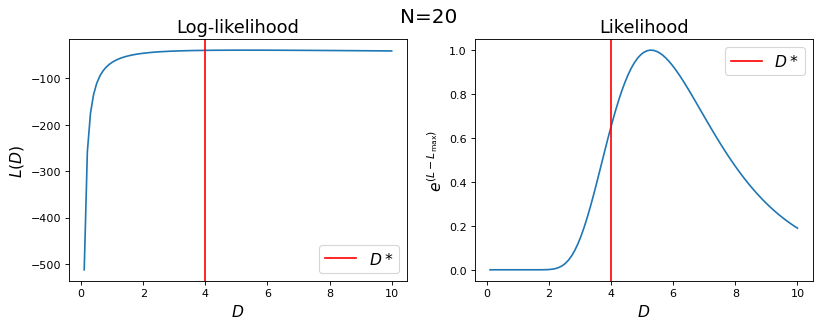

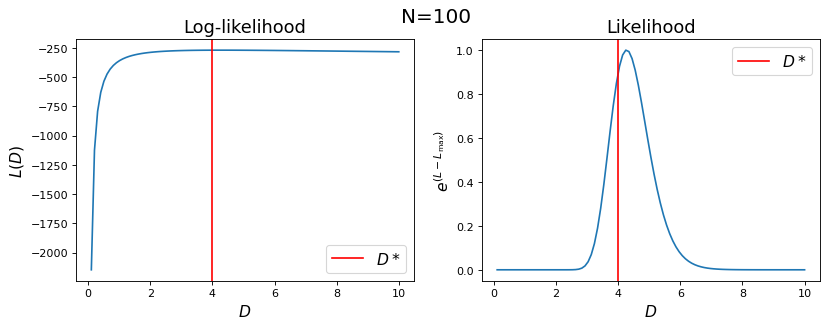

In [7]:
tab_N = [10, 20, 100]
for N in tab_N:
    np.random.seed(111)
    t = levy.rvs(loc=0, scale=d_true**2/(2*D_true), size=N)

    tab_D = np.linspace(0, 10, 100)[1:]
    logl_D = np.array([loglh(d_true, D, t) for D in tab_D])

    fig = plt.figure(figsize=(12,4), dpi=80)
    fig.suptitle(f'N={N}', fontsize=18)
    plt.subplot(121)
    plt.title('Log-likelihood', fontsize=16)
    plt.xlabel('$D$', fontsize=14)
    plt.ylabel('$L(D)$', fontsize=14)
    plt.plot(tab_D, logl_D)
    plt.axvline(D_true, color="r",label='$D*$')
    plt.legend(fontsize=14);

    plt.subplot(122)
    plt.title('Likelihood', fontsize=16)
    plt.xlabel('$D$', fontsize=14)
    plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
    plt.plot(tab_D ,np.exp(logl_D -max(logl_D)))
    plt.axvline(D_true,color="r",label='$D*$')
    plt.legend(fontsize=14);

Looking at the log-likelihood graphs above, we can barely see the difference in the function for different $N$ (except for the y-axis values). That is why we also plot the normalized likelihood, where the distinction is clearly visible. We observe that for $N=10$, the maximum is quite far from the $D^*$ but, as $N$ is being increased, the maximum gets closer to the true value, which can be seen for $N=20$. Finally, we get the best match between $D^*$ and what the ML estimator would "say" for $N=100$. In conclusion, the more data we have, the better estimate we get.

However, since the specific realizations $\{t_i\}$ are still random and due to chance, it would be interesting to confirm the results above by averaging the log-likelihood over many repetitions ($N_{iter}=100$), for each $N$. The results - log-likelihood and normalized likelihood - are plotted below.

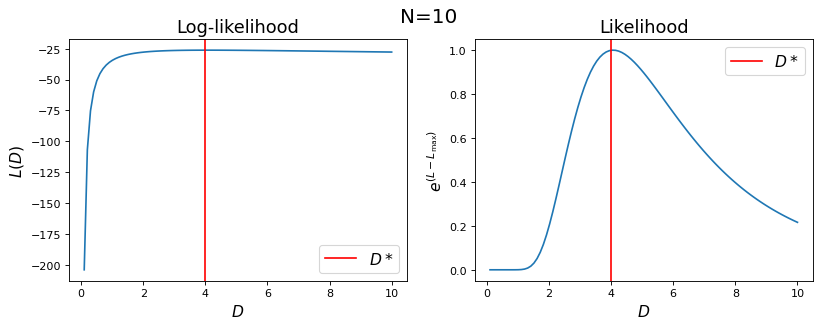

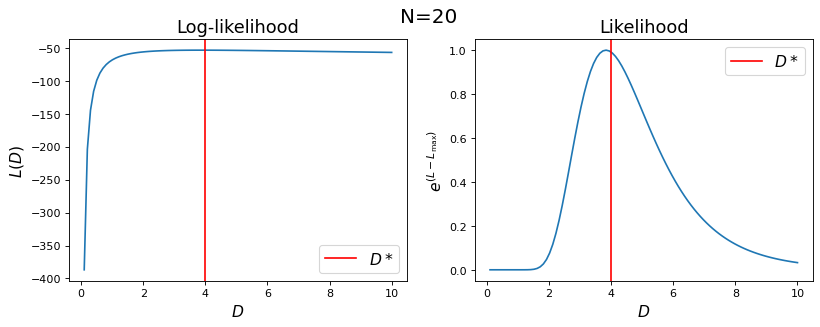

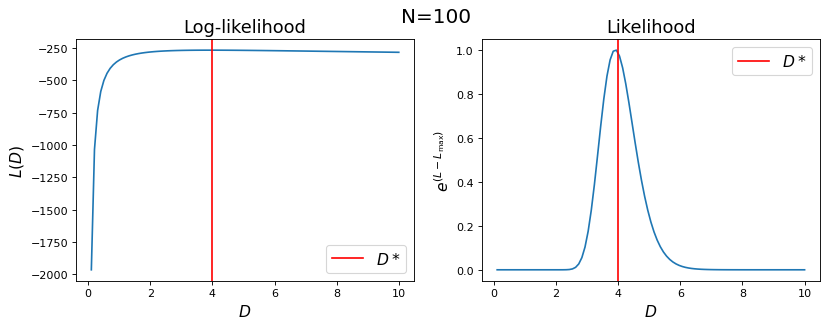

In [8]:
tab_N = [10, 20, 100]
Niter = 100
for N in tab_N:
    logl_D = np.zeros(len(tab_D))
    for ir in range(Niter):
        t = levy.rvs(loc=0, scale=d_true**2/(2*D_true), size=N)

        tab_D = np.linspace(0, 10, 100)[1:]
        logl_D += np.array([loglh(d_true, D, t) for D in tab_D])
    
    logl_D /= Niter
    
    fig = plt.figure(figsize=(12,4), dpi=80)
    fig.suptitle(f'N={N}', fontsize=18)
    plt.subplot(121)
    plt.title('Log-likelihood', fontsize=16)
    plt.xlabel('$D$', fontsize=14)
    plt.ylabel('$L(D)$', fontsize=14)
    plt.plot(tab_D, logl_D)
    plt.axvline(D_true, color="r",label='$D*$')
    plt.legend(fontsize=14);

    plt.subplot(122)
    plt.title('Likelihood', fontsize=16)
    plt.xlabel('$D$', fontsize=14)
    plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
    plt.plot(tab_D ,np.exp(logl_D -max(logl_D)))
    plt.axvline(D_true,color="r",label='$D*$')
    plt.legend(fontsize=14);

As it was expected, on average, for $N=100$, the likelihood has very small variance around $D^*$. For smaller $N$, the match between the maximum and $D^*$ is better than the arbitrary case we had before, but the likelihood still has non-negligible values for $D$ relatively far from $D^*$.

### Task 3: Maximum Likelihood Estimator

In total, we design 25 ML estimators: for each $N\in\{1, 10, 100, 1000, 10000\}$ and $D^*\in\{1,2,3,4,5\}$. Apart from $\widehat{D}_{ML}(\{t_i\})$, we also compute the squared error $SE$.

In [9]:
%%time

tab_N = np.logspace(0, 4, num=5, base=10)
tab_D = np.linspace(0, 5, 6)[1:]
D_ML = np.zeros((len(tab_D), len(tab_N)))
SE_ML = np.zeros((len(tab_D), len(tab_N)))

for j, DD in enumerate(tab_D):
    print(DD)
    for i,N in enumerate(tab_N):
        t = levy.rvs(loc=0, scale=d_true**2/(2*DD), size=int(N))
        D_guess = np.random.uniform(0,5)
        optimum = minimize(lambda D: -loglh(d_true, D, t), D_guess, method='Nelder-Mead')
        D_ML[j,i] = optimum.x
        SE_ML[j,i] = (D_ML[j,i] - DD)**2

1.0
2.0
3.0
4.0
5.0
CPU times: total: 28 s
Wall time: 28.6 s


Then, we plot the squared error for each estimator on the same graph, and zoom in the y-axis for better view.

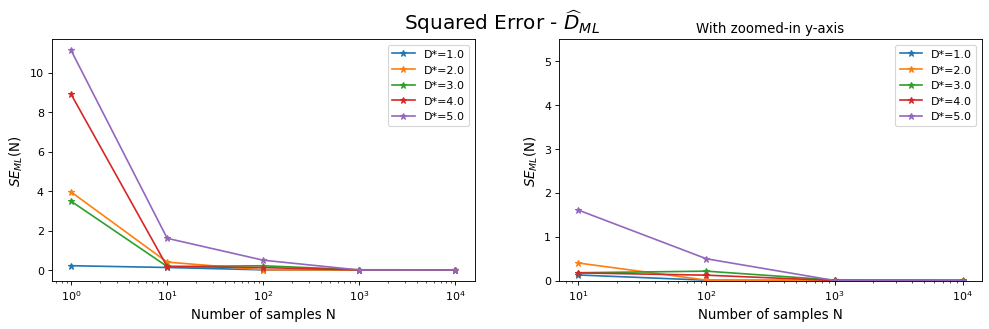

In [10]:
fig = plt.figure(figsize=(15,4), dpi=80)
plt.suptitle('Squared Error - $\widehat{D}_{ML}$', fontsize=18)
for i, DD in enumerate(tab_D):
    plt.subplot(121)
    plt.plot(tab_N, SE_ML[i], marker="*", label=f"D*={DD}")
    plt.xlabel('Number of samples N', fontsize=12)
    plt.ylabel('$SE_{ML}$(N)', fontsize=12)
    plt.xscale('log')
    plt.legend(fontsize=10)
    
    plt.subplot(122)
    plt.title('With zoomed-in y-axis')
    plt.plot(tab_N[1:], SE_ML[i,1:], marker="*", label=f"D*={DD}")
    plt.xlabel('Number of samples N', fontsize=12)
    plt.ylabel('$SE_{ML}$(N)', fontsize=12)
    plt.xscale('log')
    plt.ylim((-0.01,5.5))
    plt.legend(fontsize=10)


We observe that, as $N$ increases, the squared error decreases. As we discussed in *Task 2*, with more data points, the ML estimation becomes more accurate, hence the error is lower.

### Task 4: Maximum a posteriori Estimator

Maximum a posteriori method, as the name says, estimates the unknown parameter $D$ as a point $\widehat{D}$ where the posterior distribution reaches its maximum. By employing the Bayes rule and taking into account that $D$ and $d$ are independent, this distribution can be writen as:
$$
P(D|\{t_i\},d) \propto P(\{t_i\}|D,d)\;P(D)
$$
The first factor is the likelihood, whose formula we have seen before, while the second factor is the apriori distribution. For it, we take the Jeffreys prior, given by:
$$
P(D) \propto \sqrt{I_N(D)} = \sqrt{\frac{N}{2}}\frac{1}{D} \propto \frac{1}{D}
$$

We utilize this theory and transform it into code:

In [11]:
def jeffpost(d, D, t):
    jp= - np.log(D) # Jeffrey's prior
    for i in t: jp += np.log( d/np.sqrt(4*np.pi*D*i**3) * np.exp(-d*d/(4*D*i)) )
    return jp

We repeat the same procedure for estimator design as in *Task 3*:

In [314]:
%%time

tab_N = np.logspace(0, 4, num=5, base=10)
tab_D = np.linspace(0, 5, 6)[1:]
D_J = np.zeros((len(tab_D), len(tab_N)))
SE_J = np.zeros((len(tab_D), len(tab_N)))

for j, DD in enumerate(tab_D):
    print(DD)
    for i,N in enumerate(tab_N):
        t = levy.rvs(loc=0, scale=d_true**2/(2*DD), size=int(N))
        D_guess = np.random.uniform(0,5)
        optimum = minimize(lambda D: -jeffpost(d_true, D, t), D_guess, method='Nelder-Mead')
        D_J[j,i] = optimum.x
        SE_J[j,i] = (D_J[j,i] - DD)**2

1.0
2.0
3.0
4.0
5.0
CPU times: total: 20.9 s
Wall time: 20.9 s


Again, we plot the squared error:

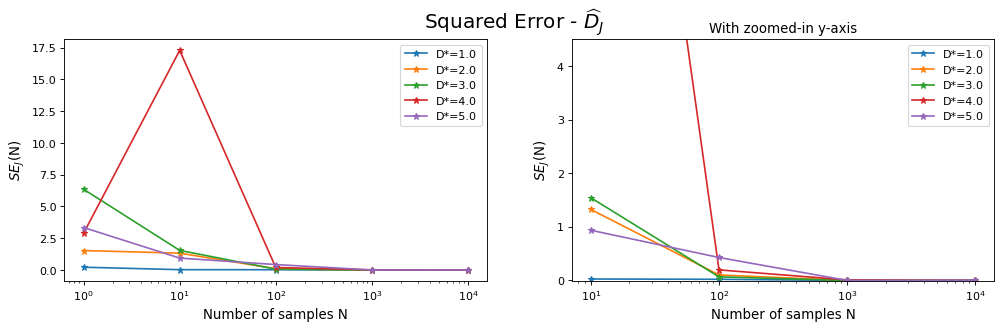

In [13]:
fig = plt.figure(figsize=(15,4), dpi=80)
plt.suptitle('Squared Error - $\widehat{D}_{J}$', fontsize=18)
for i, DD in enumerate(tab_D):
    plt.subplot(121)
    plt.plot(tab_N, SE_J[i], marker="*", label=f"D*={DD}")
    plt.xlabel('Number of samples N', fontsize=12)
    plt.ylabel('$SE_{J}$(N)', fontsize=12)
    plt.xscale('log')
    plt.legend(fontsize=10)
    
    plt.subplot(122)
    plt.title('With zoomed-in y-axis')
    plt.plot(tab_N[1:], SE_J[i,1:], marker="*", label=f"D*={DD}")
    plt.xlabel('Number of samples N', fontsize=12)
    plt.ylabel('$SE_{J}$(N)', fontsize=12)
    plt.xscale('log')
    plt.ylim((-0.01,4.5))
    plt.legend(fontsize=10)

As with the ML estimator, we again observe that the trend of $SE$ is decreasing with $N$. Of course, there are slight deviations from this rule, where for some larger $N$ the $SE$ is also larger, but that is all due to chance and the fact we are working with a finite sample of the population.

### Task 5: MSE

First, we define the function `minimizer_D`, which produces $N_{rep}$ estimations of parameter $D$, given the method we want to use: ML or MAP.

In [14]:
def minimizer_D(func, D0):
    D_est = np.zeros(Nrep)
    for ir in range(Nrep):
        t = levy.rvs(loc=0, scale=d_true**2/(2*D0), size=int(N))
        D_guess = np.random.uniform(0,5)
        D_est[ir] = minimize(lambda D: -func(d_true, D, t), D_guess, method='Nelder-Mead').x
    return D_est

In [15]:
Nrep = 400
Nest = 20
tab_D0 = np.linspace(0, 5, Nest+1)[1:]
tab_N = [10, 100, 1000]

In [16]:
%%time

N = 10
D_ML= np.array([ minimizer_D(loglh, D0) for D0 in tab_D0])
D_J= np.array([ minimizer_D(jeffpost, D0) for D0 in tab_D0])

CPU times: total: 1min 37s
Wall time: 1min 38s


We want to estimate the MSE, thus we define the function `MSE_est` which takes the $N_{rep}$ estimations of $D$ and the true value, and outputs the MSE estimation along with the confidence interval bounds. The estimation is in fact done using *bootstraping*.

In [17]:
def MSE_est(D_est, D0):
    Nboot = 200
    MSE = (D_est - np.full(Nrep, D0))**2
    MSE_mean = MSE.mean()
    MSE_boot = np.random.choice(MSE, (Nboot, Nrep))
    MSE_boot_mean = MSE_boot.mean(axis=1)
    CI = np.percentile(MSE_boot_mean, [2.5, 97.5])
    CI_min = CI[0]
    CI_max = CI[1]
    return MSE_mean, CI_min, CI_max

Then, for sample sizes $N\in\{10, 100, 1000\}$, we define $N_{rep}\in\{400,400,200\}$. For large $N=1000$, we use smaller $N_{rep}=200$, due to the time complexity of the algorithm. We want to estimate the MSE for $N_{est}=20$ different values of $D^*$. So, for each $N$, we estimate each of the $N_{est}$ $D^*$s $N_{rep}$ times for each estimator, and finally, with bootstraping, we get the MSE estimate for each $D^*$.

In [ ]:
%%time

tab_N = [10, 100, 1000]
tab_Nrep = [400, 400, 200]
Nest = 10

tab_D0 = np.linspace(0, 5, Nest+1)[1:]
MSE_ML = np.zeros((len(tab_N), Nest))
CI_min_ML = np.zeros((len(tab_N), Nest))
CI_max_ML = np.zeros((len(tab_N), Nest))
MSE_J = np.zeros((len(tab_N), Nest))
CI_min_J = np.zeros((len(tab_N), Nest))
CI_max_J = np.zeros((len(tab_N), Nest))

for i,N in enumerate(tab_N):
    Nrep = tab_Nrep[i]
    #print(f"Entering N={N}")
    D_ML= np.array([ minimizer_D(loglh, D0) for D0 in tab_D0])
    D_J= np.array([ minimizer_D(jeffpost, D0) for D0 in tab_D0])
    
    for j, D0 in enumerate(tab_D0):
        #print(f"Entering N={N}, D0={D0}")
        MSE, CI_min, CI_max = MSE_est(D_ML[j], D0)
        MSE_ML[i,j] = MSE
        CI_min_ML[i,j] = CI_min
        CI_max_ML[i,j] = CI_max
        MSE, CI_min, CI_max = MSE_est(D_J[j], D0)
        MSE_J[i,j] = MSE
        CI_min_J[i,j] = CI_min
        CI_max_J[i,j] = CI_max

Now we plot the estimates of the MSE for each estimator and sample size, along with the theoretical Cramér–Rao bound.

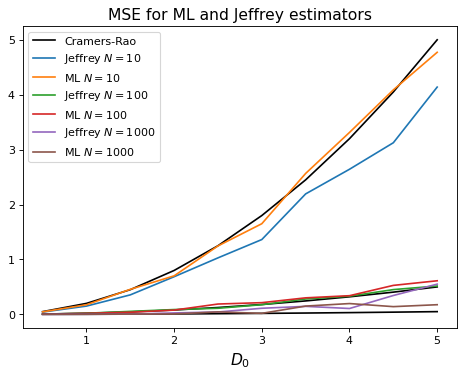

In [24]:
fig = plt.figure(figsize=(7, 5), dpi=80)
plt.title('MSE for ML and Jeffrey estimators', fontsize=14)
for i,N in enumerate(tab_N):
    if i == 0:
        plt.plot(tab_D0, 2*tab_D0*tab_D0/N, label='Cramers-Rao', color='k')
    else:
        plt.plot(tab_D0, 2*tab_D0*tab_D0/N, color='k')
    plt.xlabel('$D_0$', fontsize=14)
    plt.plot(tab_D0, MSE_J[i], marker="", label=f'Jeffrey $N={N}$')
    plt.plot(tab_D0, MSE_ML[i], marker="", label=f'ML $N={N}$')
    plt.legend(fontsize=10, loc='upper left')

Cramér–Rao bound tells us what is the lowest possible MSE we can get:
$$
MSE \geq \frac{1}{I_N(D)} = \frac{2D^2}{N}
$$
So, as expected, we observe from the graph that it increases quadratically with $D$. We also see that for $N=10$, $MSE_J$ is below the theoretical lower bound. This makes sense because the Cramér–Rao bound is defined for unbiased estimators, and MAP with Jeffreys prior is in fact biased. Furthermore, we notice that the bound, as well as the MSE estimates, have larger values when $N$ is smaller.

For better visibility, the empirical MSEs are plotted again separately:

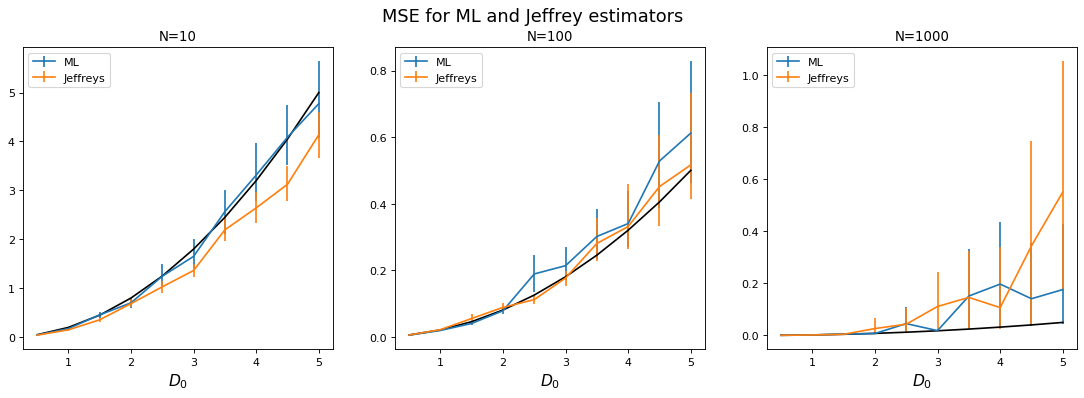

In [325]:
fig = plt.figure(figsize=(17, 5), dpi=80)
plt.suptitle('MSE for ML and Jeffrey estimators', fontsize=16)
for i,N in enumerate(tab_N):
    plt.subplot(1, 3, i+1)
    plt.title(f'N={N}', fontsize=12)
    plt.xlabel('$D_0$', fontsize=14)
    plt.errorbar(tab_D0,MSE_ML[i],yerr=[MSE_ML[i]-CI_min_ML[i], CI_max_ML[i]-MSE_ML[i]],marker="", label='ML')
    plt.errorbar(tab_D0,MSE_J[i],yerr=[MSE_J[i]-CI_min_J[i], CI_max_J[i]-MSE_J[i]],marker="", label='Jeffreys')
    plt.plot(tab_D0, 2*tab_D0*tab_D0/N, color='k')
    plt.legend(fontsize=10, loc='upper left')

### Task 6: Discussion

As the sample size $N$ increases, $MSE_{ML}$ and $MSE_J$ get closer to each other, but also to the Cramér–Rao bound. For $N=100$, $MSE_J$ is almost coinciding with the bound, even if it is biased. We can conclude that, for smaller $N$, $MSE_{ML}$ is larger than $MSE_{J}$, but the difference disappears as $N$ increases.

We notice that the MSE of the ML estimator sometimes gets below the bound, which is theoretically impossible, but we have to keep in mind that we are working with *empirical* - calculated on a finite sample - not *theoretical* MSE.

The graphs for $N=1000$ look very "unstable" and they might seem worse than the other two graphs, but if we look at the MSE values, they are actually smaller than for other two $N$s. This oscillatory behaviour originates from the smaller $N_{rep}$ we use, among other factors. Additionally, only for $N=1000$ $MSE_J$ lies (almost) completely above the bound.

Even though the variance of Jeffreys estimator is lower (especially for smaller $N$), because it is biased, the result would not be accurate. That is why I would choose the unbiased ML estimator.

### Task 7 (Bonus 2): Median-based Estimator



The median of Levy's distribution, with our parameters, is:
$$
    \text{med} = \frac{d^2}{4 D \; (erfc^{-1}(0.5))^2}
$$
We will estimate it for different sample sizes:

In [187]:
%%time

tab_N = np.logspace(0, 4, num=100, base=10)
med_t = np.zeros(len(tab_N))

for i, N in enumerate(tab_N):
    t = levy.rvs(loc=0, scale=d_true**2/(2*D_true), size=int(N))
    med_t[i] = np.median(t)

CPU times: total: 46.9 ms
Wall time: 28.4 ms


From the expression for the median, we can extract $D$ as:

$$
    D = \frac{d^2}{4 \; (erfc^{-1}(0.5))^2 \; \text{med}}
$$

In [188]:
D_med = d_true**2 / (4*erfcinv(0.5)**2*med_t)

Now, we plot our estimations of $D$ for different $N$ and compare it with the true value $D^*$:

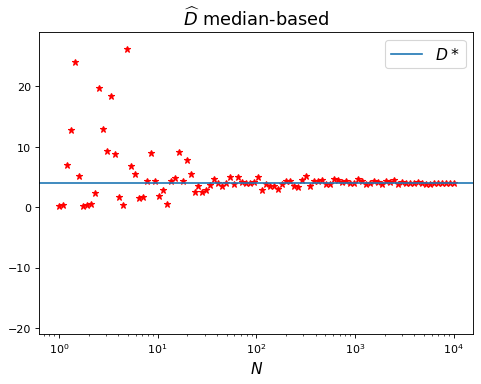

In [194]:
fig = plt.figure(figsize=(7,5), dpi=80)
plt.title('$\widehat{D}$ median-based', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N, D_med, "*",color='r')
plt.axhline(D_true, label='$D*$')
plt.xscale("log")
plt.ylim(-21,29)
plt.legend(fontsize=14)

We see that the estimator works well, and that the estimations get more and more acurate the more samples we have.

Now, we calculate the squared error, for which we alternate the optimal $D$ between 0 and 5:

In [262]:
%%time

tab_N = np.logspace(0, 4, num=50, base=10)
tab_D = np.linspace(0, 5, 6)[1:]
D_MED = np.zeros((len(tab_D), len(tab_N)))
SE_MED = np.zeros((len(tab_D), len(tab_N)))

for j, DD in enumerate(tab_D):
    for i,N in enumerate(tab_N):
        t = levy.rvs(loc=0, scale=d_true**2/(2*DD), size=int(N))
        med = np.median(t)
        D_MED[j,i] = d_true**2 / (4*erfcinv(0.5)**2*med)
        SE_MED[j,i] = (D_MED[j,i] - DD)**2

CPU times: total: 62.5 ms
Wall time: 82.6 ms


And finally we plot the squared error we obtained:

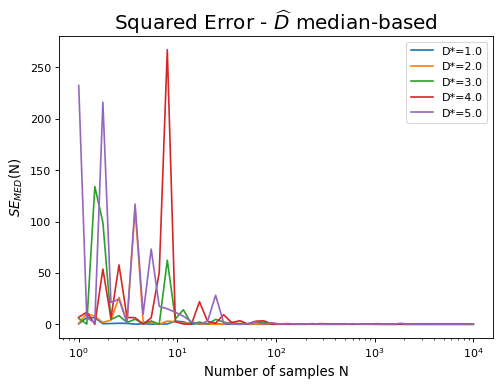

In [264]:
fig = plt.figure(figsize=(7,5), dpi=80)
plt.title('Squared Error - $\widehat{D}$ median-based', fontsize=18)
for i, DD in enumerate(tab_D):
    plt.plot(tab_N, SE_MED[i], marker="", label=f"D*={DD}")
    plt.xlabel('Number of samples N', fontsize=12)
    plt.ylabel('$SE_{MED}$(N)', fontsize=12)
    plt.xscale('log')
    plt.legend(fontsize=10)

As expected, the peaks with high intensity are present for smaller $N$, approximately from 1 to 30, but the overall trend is descending. For $N=100$ and beyond this value, the squared error is "tamed".

Now, we want to see how the MSE behaves. To do that, we will first implement the function `median_D` which returns $N_{rep}$ estimations of $D^*$ for a fixed size $N$:

In [265]:
def median_D(D0):
    D_est = np.zeros(Nrep)
    for ir in range(Nrep):
        t = levy.rvs(loc=0, scale=d_true**2/(2*D0), size=int(N))
        med = np.median(t)
        D_est[ir] = d_true**2 / (4*erfcinv(0.5)**2*med)
    return D_est

We repeat the same analysis as with ML and MAP estimators. Since the median-based estimator is way more computationally simple, we set $N_{rep}$ and $N_{est}$ higher than before:

In [ ]:
%%time

tab_N = [10, 100, 1000]
tab_Nrep = [500, 500, 500]
Nest = 100

tab_D0 = np.linspace(0, 5, Nest+1)[1:]
MSE_MED = np.zeros((len(tab_N), Nest))
CI_min_MED = np.zeros((len(tab_N), Nest))
CI_max_MED = np.zeros((len(tab_N), Nest))

for i,N in enumerate(tab_N):
    Nrep = tab_Nrep[i]
    print(f"Entering N={N}")
    D_MED = np.array([ median_D(D0) for D0 in tab_D0])
    
    for j, D0 in enumerate(tab_D0):
        print(f"Entering N={N}, D0={D0}")
        MSE, CI_min, CI_max = MSE_est(D_MED[j], D0)
        MSE_MED[i,j] = MSE
        CI_min_MED[i,j] = CI_min
        CI_max_MED[i,j] = CI_max

Then, we plot estimated MSE for each $N\in\{10, 100, 1000\}$ together with the corresponding Cramer-Rao bound:

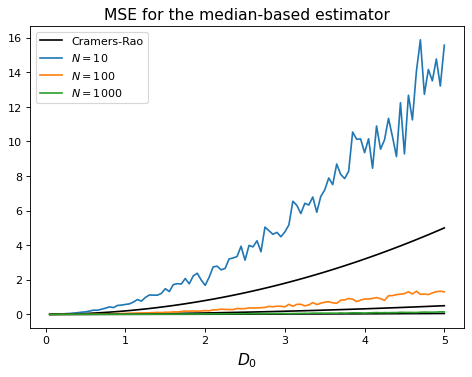

In [309]:
fig = plt.figure(figsize=(7, 5), dpi=80)
plt.title('MSE for the median-based estimator', fontsize=14)
for i,N in enumerate(tab_N):
    if i == 0:
        plt.plot(tab_D0, 2*tab_D0*tab_D0/N, label='Cramers-Rao', color='k')
    else:
        plt.plot(tab_D0, 2*tab_D0*tab_D0/N, color='k')
    plt.xlabel('$D_0$', fontsize=14)
    plt.plot(tab_D0, MSE_MED[i], marker="", label=f'$N={N}$')
    #plt.vlines(tab_D0[0:-1:3], ymin=CI_min_MED[i,0:-1:3], ymax=CI_max_MED[i,0:-1:3], color='r')
    plt.legend(fontsize=10, loc='upper left')

We notice that the $MSE_{med}$ now drastically deviates from the bound, which was not the case with ML and MAP estimators. This is even more obvious by looking at the separate $MSE_{med}$ plots for each $N$ below. The confidence intervals are not plotted for each $D_0$, as the graphs would be rather messy, but for every 3$^{rd}$ point. We also notice that, as with ML and MAP, the MSE increases as $N$ grows.

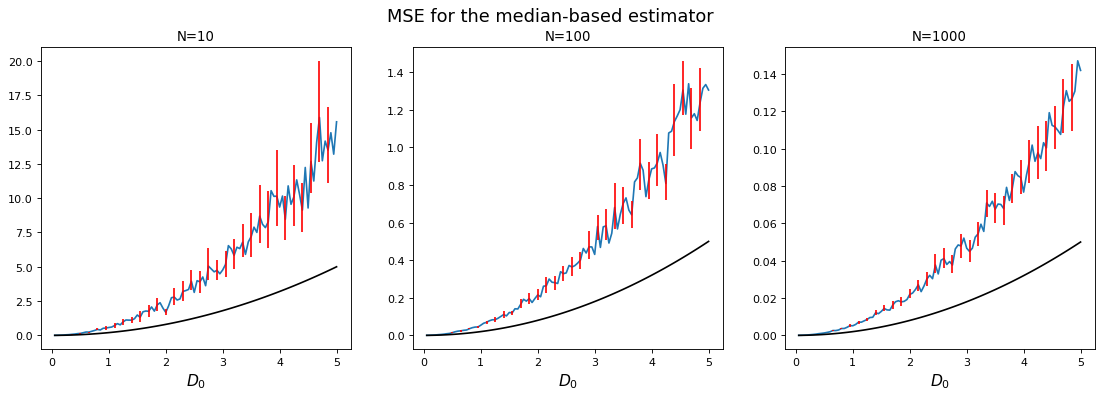

In [310]:
fig = plt.figure(figsize=(17, 5), dpi=80)
plt.suptitle('MSE for the median-based estimator', fontsize=16)
for i,N in enumerate(tab_N):
    plt.subplot(1, 3, i+1)
    plt.title(f'N={N}', fontsize=12)
    plt.xlabel('$D_0$', fontsize=14)
    plt.plot(tab_D0, MSE_MED[i])
    plt.vlines(tab_D0[0:-1:3], ymin=CI_min_MED[i,0:-1:3], ymax=CI_max_MED[i,0:-1:3], color='r')
    plt.plot(tab_D0, 2*tab_D0*tab_D0/N, color='k')

Now, we can see more clearly that the MSE drops around 20 times from $N=10$ to $N=100$ and 10 times from $N=100$ to $N=1000$, which indicates the influence strength of the sample size.

For the purpose of comparative analysis, we plot the MSE of all designed estimators, as well as the Cramer-Rao bound, on the same plot for each $N$.

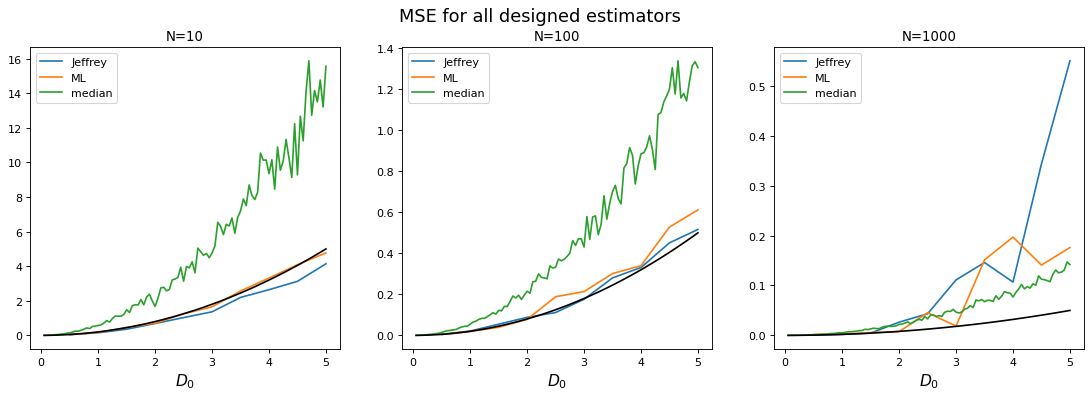

In [311]:
tab_D0_ML_J = np.linspace(0, 5, 10+1)[1:]
tab_D0_MED = np.linspace(0, 5, 100+1)[1:]

fig = plt.figure(figsize=(17, 5), dpi=80)
plt.suptitle('MSE for all designed estimators', fontsize=16)
for i,N in enumerate(tab_N):
    plt.subplot(1, 3, i+1)
    plt.title(f'N={N}', fontsize=12)
    plt.xlabel('$D_0$', fontsize=14)
    plt.plot(tab_D0_ML_J, MSE_J[i], marker="", label='Jeffrey')
    plt.plot(tab_D0_ML_J, MSE_ML[i], marker="", label='ML')
    plt.plot(tab_D0_MED, MSE_MED[i], marker="", label='median')
    plt.plot(tab_D0, 2*tab_D0*tab_D0/N, color='k')
    plt.legend(fontsize=10, loc='upper left')

As we discussed, $MSE_{med}$ is way above the Crammer-Rao bound, as well as above the MSEs of the other two estimators. The "noisiness" of the $MSE_{med}$ originates from the higher $N_{est}$ we used. We also notice that, for $N=1000$, the MSEs get closer together, so the higher the $N$, the lower the difference. Of course, the resemblance between the MSEs would be even more visible if we used more repetitions ($N_{rep}$) for $N=1000$ but, again, due to the big time complexity, it would not be feasible.

Median-based estimator would not be my final choice due to the high MSE it has for lower $N$. Of course, the results get better as $N$ increases, but I could get similarly good results both with ML and MAP.

## Exercise 2: Probability bounds and a polling problem

Our task is to prove that
$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq e^{-2m\epsilon^2}
$$
for any $\epsilon \geq 0$, where $Z_1,...Z_m$ are independent random variables coming from $Bernoulli$'s distribution, given by the following distribution law:

$$
Z_i \sim
\begin{pmatrix}
    0 & 1 \\
    1-p & p
\end{pmatrix}
$$

### Task 1:

First, we use the property that, for any $\lambda \geq 0$, $P(a \geq b) = P(e^{\lambda a} \geq e^{\lambda b})$:

$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) =
\mathbb{P} \left( \sum_i Z_i \geq m \; (p + \epsilon) \right) =
\mathbb{P} \left( e^{\lambda \sum_i Z_i} \geq e^{\lambda m (p + \epsilon)} \right)
$$

After that, we will prove the requested inequality with the help of **Markov inequality**:

$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq \frac{ \mathbb{E}(e^{\lambda \sum_i Z_i}) }{ e^{\lambda m (p + \epsilon)} }
$$

Note that the denominator is positive so the Markov inequality can be applied. So, we need to calculate the expectation on the right-hand-side. In the final step of the following calculation, we use the fact that the $Z_i$s are independent:

$$
\mathbb{E} \left( e^{\lambda \sum_i Z_i} \right) =
\mathbb{E} \left( (e^{\lambda})^{\sum_i Z_i} \right) =
\prod_{i=1}^m \mathbb{E} \left( (e^{\lambda})^{Z_i} \right)
$$

The expectation above, for a single *Bernoulli*-distributed variable (more precisely - a function of a single variable) is calculated as:

$$
\mathbb{E} \left( (e^{\lambda})^{Z_i} \right) = (e^{\lambda})^0 (1-p) + (e^{\lambda})^1 p = p e^{\lambda} + 1-p
$$
and then we get the joint expectation:

$$
\mathbb{E} \left( (e^{\lambda})^{\sum_i Z_i} \right) = (p e^{\lambda} + 1-p)^m
$$

Finally, using the fact that $e^{\lambda m (p+\epsilon)} = \left(e^{\lambda (p+\epsilon)}\right)^m$ and the joint expectation found above, we prove the requested inequality:

$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq
\frac{ \mathbb{E}(e^{\lambda \sum_i Z_i}) }{ e^{\lambda m (p + \epsilon)} } = 
\left( \frac{p e^{\lambda} + 1-p}{e^{\lambda (p+\epsilon)}} \right) ^ m
$$

### Task 2:

We start of the derivation by taking the log of the right-hand-side of the inequality above:

$$
\log \left[ \left( \frac{p e^{\lambda} + 1-p}{e^{\lambda (p+\epsilon)}} \right) ^ m \right] = 
m\; \left[ \log \left( pe^{\lambda}+1-p \right)  - \lambda (p+\epsilon) \right]
$$
Then, we differentiate the expression (we will mark it as $(*)$) and make it equal to zero in order to find the minimum:

$$
\frac{\partial (*)}{\partial \lambda} \bigg|_{\lambda=\lambda_0} = 
m \; \left[ \frac{p e^{\lambda_0}}{p e^{\lambda_0}+1-p} - (p+\epsilon) \right] = 0
$$
where $\lambda_0$ is the argument that minimizes $(*)$. We further get:

$$
\begin{align}
    \frac{p e^{\lambda_0}}{p e^{\lambda_0}+1-p} - (p+\epsilon) &= 0 \Rightarrow \frac{p e^{\lambda_0}}{p e^{\lambda_0}+1-p} = (p+\epsilon) \\
    &\Rightarrow \frac{p e^{\lambda_0}}{p e^{\lambda_0}+1-p} = (p+\epsilon) \\
    &\Rightarrow p e^{\lambda_0} (1-(p+\epsilon)) = (1-p)(p+\epsilon) \\
    &\Rightarrow e^{\lambda_0} = \frac{(1-p)(p+\epsilon)}{p (1-(p+\epsilon))} \\
    &\Rightarrow \lambda_0 = \log \left[ \frac{(1-p)(p+\epsilon)}{p (1-(p+\epsilon))} \right]
\end{align}
$$

After we have found the optimal $\lambda_0$, we put it back in the original right-hand-side of the inequality from *Task 1* and rearrange it a bit:

$$
\begin{align}
    \left( \frac{p e^{\lambda_0} + 1-p}{e^{\lambda_0 (p+\epsilon)}} \right)^m &= 
        \left( \frac{\frac{(1-p)(p+\epsilon)}{(1-(p+\epsilon))} + (1-p)}{\left( \frac{(1-p)(p+\epsilon)}{p (1-(p+\epsilon))} \right)^{(p+\epsilon)}} \right) ^ m \\
    &= \left( \frac{\frac{1-p}{1-(p+\epsilon)}}{\left( \frac{1-p}{1-(p+\epsilon)} \right)^{(p+\epsilon)} \left( \frac{p+\epsilon}{p} \right)^{(p+\epsilon)} }\right)^m \\
    &= \left[ \left( \frac{1-(p+\epsilon)}{1-p} \right)^{(p+\epsilon-1)} \left( \frac{p}{p+\epsilon} \right)^{(p+\epsilon)} \right]^m
\end{align}
$$

Using $a = e^{\log(a)}$, we get:

$$
\begin{align}
    \left[ \left( \frac{1-(p+\epsilon)}{1-p} \right)^{(p+\epsilon-1)} \left( \frac{p}{p+\epsilon} \right)^{(p+\epsilon)} \right]^m &=
    \large{e}^{m\left[ \log \left( \frac{1-(p+\epsilon)}{1-p} \right)^{(p+\epsilon-1)} + \log \left( \frac{p}{p+\epsilon} \right)^{(p+\epsilon)} \right]} \\
    &= \large{e}^{-m \left[ (-(p+\epsilon-1)) \log \left( \frac{1-(p+\epsilon)}{1-p} \right) + (p+\epsilon) \left(- \log \left( \frac{p}{p+\epsilon} \right) \right) \right]} \\
    &= \large{e}^{-m \left[ (1-(p+\epsilon)) \log \left( \frac{1-(p+\epsilon)}{1-p} \right) + (p+\epsilon) \log \left( \frac{p+\epsilon}{p} \right) \right]} \\
    &= \large{e}^{-m f(p,\epsilon)}
\end{align}
$$

We have derived the expression. Since the inequality stands for every $\lambda \geq 0$, and $\lambda_0$ is in fact greater than zero:

$$
\lambda_0 = \log \left[ \frac{(1-p)(p+\epsilon)}{p (1-(p+\epsilon))} \right] = \log \left[ \frac{(1-p)(p+\epsilon)}{(1-p)(p+\epsilon) - \epsilon} \right] \xrightarrow{\epsilon \geq 0}  \frac{(1-p)(p+\epsilon)}{(1-p)(p+\epsilon) - \epsilon} \geq 1 \Rightarrow \lambda_0 \geq 0
$$

we have proved that the inequality is true:

$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq e^{-m f(p,\epsilon)}
$$

### Task 3:

Let us first write the starting point - the expression for $f(p,\epsilon)$:

$$
f(p,\epsilon) = (p+\epsilon) \log \left( \frac{p+\epsilon}{p} \right) + (1-(p+\epsilon)) \log \left( \frac{1-(p+\epsilon)}{1-p} \right)
$$

**I** -  First, we prove that $f(p,\epsilon=0)=0$

$$
f(p, \epsilon=0) = p \log \left( \frac{p}{p} \right) + (1-p) \log \left( \frac{1-p}{1-p} \right) = p*0 + (1-p)*0 = 0 
$$

**II** -  Then, we prove that $\frac{\partial f(p,\epsilon)}{\partial \epsilon} \big|_{\epsilon=0} = 0$. To do that, we first must calculate the first derivative:

$$
\begin{align}
\frac{\partial f(p, \epsilon)}{\partial \epsilon} &= \log \left( \frac{p+\epsilon}{p} \right) + (p+\epsilon) \frac{p}{p+\epsilon} \frac{1}{p} - \log \left( \frac{1-(p+\epsilon)}{1-p} \right) - (1-(p+\epsilon)) \frac{1-p}{1-(p+\epsilon)} \frac{1}{1-p} \\
&= \log \left( \frac{p+\epsilon}{p} \right) + 1 - \log \left( \frac{1-(p+\epsilon)}{1-p} \right) - 1 \\
&= \log \left( \frac{p+\epsilon}{p} \right) - \log \left( \frac{1-(p+\epsilon)}{1-p} \right)
\end{align}
$$
Now we can find the final result:

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} \bigg|_{\epsilon=0} =
\log \left( \frac{p}{p} \right) - \log \left( \frac{1-p}{1-p} \right) =
0 - 0 = 0
$$

**III** - Finally, we will prove that $\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} \geq 4$ for each $\epsilon$ such that $0 \leq p+\epsilon \leq 1$. As before, we need to start by calculating the corresponding derivative:

$$
\begin{align}
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} &= \frac{\partial}{\partial \epsilon} \left( \frac{\partial f(p,\epsilon)}{\partial \epsilon} \right) \\ 
&= \frac{p}{p+\epsilon} \frac{1}{p} + \frac{1-p}{1-(p+\epsilon)} \frac{1}{1-p} \\
&= \frac{1}{p+\epsilon} + \frac{1}{1-(p+\epsilon)} \\
&= \frac{1}{\alpha} + \frac{1}{1-\alpha}
\end{align}
$$
where $\alpha = p + \epsilon \in [0,1]$. Note that $1-\alpha \in [0,1]$ as well. We can write the expression above as follows:

$$
\begin{align}
\frac{1}{\alpha} + \frac{1}{1-\alpha} &= \frac{\alpha + (1-\alpha)}{\alpha} + \frac{\alpha + (1-\alpha)}{1-\alpha} \\
&= 2 + \frac{1-\alpha}{\alpha} + \frac{\alpha}{1-\alpha}
\end{align}
$$

Now, we use the fact that... (note that the condition $\alpha, 1-\alpha \in [0,1]$ allows the values under the square root to be positive)

$$
\left( \sqrt{\frac{\alpha}{1-\alpha}} + \sqrt{\frac{1-\alpha}{\alpha}} \right)^2 = \frac{\alpha}{1-\alpha} + \frac{1-\alpha}{\alpha} - 2
$$
...together with the fact that $\forall a \in \mathbb{R}: \; a^2 \geq 0$, to finally prove the starting inequality:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{\alpha} + \frac{1}{1-\alpha} = 2 + \left( \sqrt{\frac{\alpha}{1-\alpha}} + \sqrt{\frac{1-\alpha}{\alpha}} \right)^2 + 2 \geq 4
$$

### Task 4:

Using the Taylor's approximation:

$$
f(p,\epsilon) = f(p,0) + f'(p,0) \epsilon + \frac{f''(p,\tilde{\epsilon})}{2} \epsilon^2
$$
along with the results from *Task 3*, we get:

$$
f(p, \epsilon) = 0 + 0*\epsilon + \frac{f''(p,\tilde{\epsilon})}{2} \epsilon^2 = \frac{f''(p,\tilde{\epsilon})}{2} \epsilon^2
$$

In *Task 3*, we have also proved that $\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} \geq 4$, thus we finally obtain the following:

$$
f(p, \epsilon) \geq \frac{4}{2} \epsilon^2 = 2 \epsilon^2 
$$

The initial inequality $\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq e^{-2m\epsilon^2}$ can now be verified easily:

$$
f(p, \epsilon) \geq 2 \epsilon^2 \implies e^{-m f(p,\epsilon)} \leq e^{-2m\epsilon^2}
$$
and using the result from *Task 2*, we finally get:

$$
\mathbb{P} \left( \frac{1}{m} \sum_i Z_i \geq p + \epsilon \right) \leq e^{-m f(p,\epsilon)} \leq e^{-2m\epsilon^2}
$$

**Note**: This result is only valid for $-p \leq \epsilon \leq 1-p$, as this is the interval where $f''(p,\epsilon) \geq 4$ - a fact which we use to proove the inequality. In fact, it can be shown that, for all other $\epsilon$, the second derivative is strictly less than $4$. Also, since the Taylor's approximation in the task is a linear approximation of $f(p,\epsilon)$ around $\epsilon=0$, we can only be sure of the result for relatively small $\epsilon$.

### Task 5:

The question posed in this task can mathematically be written as: *Find $m$ such that*

$$
\mathbb{P} \left( |\hat{p} - p| \leq 0.01 \right) \geq 0.95
$$

The estimate $\hat{p}$ (the fraction of people from the sample who support the president) of the true probability $p$ (the probability that a person supports the president) can be written as:

$$
\hat{p} = \frac{1}{m} \sum_{i=1}^{m} Z_i
$$

where $Z_i$ is a *Bernoulli*-distributed random variable:

$$
\mathbb{P}(Z_i = 1) = \mathbb{P}(\text{"the person supports the president"}) = p \\
\mathbb{P}(Z_i = 0) = \mathbb{P}(\text{"the person does not support the president"}) = 1-p
$$

It is possible to show that

$$
\mathbb{P} \left( |\hat{p}-p| \geq \epsilon \right) \leq 2e^{-2 m \epsilon^2}
$$

From here, we can further rearrange the expression:

$$
1 - \mathbb{P} \left( |\hat{p}-p| \leq \epsilon \right) \leq 2e^{-2 m \epsilon^2} \\
\mathbb{P} \left( |\hat{p}-p| \leq \epsilon \right) \geq 1 - 2e^{-2 m \epsilon^2}
$$

By putting $\epsilon=0.01$ and $1 - 2e^{-2 m \epsilon^2} = 0.95$, we get the answer to our initial question:

$$
m = \bigg\lceil -\frac{1}{2 \cdot 0.01^2} \log \left( \frac{1-0.95}{2} \right)\bigg\rceil = 18445
$$

### Task 6:

First, we define a function `bernoulli_sample` which takes the desired population size `m` and probability `p`, and returns a sample of $m$ *Bernoulli*-distributed random variables:

In [27]:
def bernoulli_sample(m, p):
    return bernoulli.rvs(p, size=int(m))

Then, we will "get a grasp" of how our estimate performes under $m^*=18445$ we calculated in *Task 5*:

In [37]:
m_true = 18445
tab_p = [0.2, 0.5, 0.8]
z = np.zeros((len(tab_p), m_true))

for i, p in enumerate(tab_p):
    z[i] = bernoulli_sample(m_true, p)
    
p_hat = np.mean(z, axis=1)
p_hat

array([0.20227704, 0.49829222, 0.79604229])

We see that the results are quite well, very close to the true probabilities. Now, we will repeat the experiment $N_{iter}=1000$ times in order to estimate the probability that $\hat{p}$ is correct within one percent: 

In [161]:
m_true = 18445
tab_p = [0.2, 0.5, 0.8]
Niter = 1000

p_1per = np.zeros(len(tab_p))

for i, p in enumerate(tab_p):
    cnt = 0
    for ir in range(Niter):
        z = bernoulli_sample(m_true, p)
        p_hat = np.mean(z)
        cnt += (np.abs(p_hat-p) <= 0.01)
        
    p_1per[i] = cnt / Niter
    
p_1per

array([1.   , 0.994, 0.999])

We see that, for all $p$, the estimate of probability is $\approx 1$. In other words, the results overestimate the theoretical bound. One of the possible explanations could be that, even if the bound tells us that $\mathbb{P}\left( |\hat{p}-p| \geq 0.01 \right) \leq 0.05$ using $m^*$, this is only an upper bound on the probability - who is to say that there is not another valid inequality that will give us the same result with $m \leq m^*$.

Another thing we notice is that the estimation is slightly less accurate for $p=0.5$ . This could be understood by looking at the variance of $|\hat{p}-p|$:

$$
\text{var} \left( |\hat{p}-p| \right) = \frac{p(1-p)}{m}
$$
which is larger for $p=0.5$ than for $p=0.2$ and $p=0.8$. Furthermore, $p=0.2$ and $p=0.8$ have the same variance, hence why their estimates of $\hat{p}$ are very close. Intuitively, this is due to the symmetry of $Bernoulli$'s distribution - the case when $20\%$ of people are for and $80\%$ are against the president is not mathematically any different than when $80\%$ of people are for and $20\%$ are against.

Since we got an overestimation of the error, now we seek for the $m$ which will give as an error of $\approx 95\%$: 

In [169]:
tab_m = np.linspace(1000, 15000, 29)
tab_p = [0.2, 0.5, 0.8]
Niter = 1000

p_1per = np.zeros((len(tab_p), len(tab_m)))

for i, p in enumerate(tab_p):
    for j, m in enumerate(tab_m):
        cnt = 0
        for ir in range(Niter):
            z = bernoulli_sample(m, p)
            p_hat = np.mean(z)
            cnt += (np.abs(p_hat-p) <= 0.01)
        
        p_1per[i,j] = cnt / Niter

In [170]:
for m in range(p_1per.shape[1]):
    for p in range(p_1per.shape[0]):
        print(f"For p={tab_p[p]} and m={int(tab_m[m])}: {p_1per[p,m]}", end='\t')
    print()

For p=0.2 and m=1000: 0.558	For p=0.5 and m=1000: 0.456	For p=0.8 and m=1000: 0.543	
For p=0.2 and m=1500: 0.684	For p=0.5 and m=1500: 0.573	For p=0.8 and m=1500: 0.639	
For p=0.2 and m=2000: 0.742	For p=0.5 and m=2000: 0.644	For p=0.8 and m=2000: 0.722	
For p=0.2 and m=2500: 0.779	For p=0.5 and m=2500: 0.676	For p=0.8 and m=2500: 0.813	
For p=0.2 and m=3000: 0.828	For p=0.5 and m=3000: 0.676	For p=0.8 and m=3000: 0.829	
For p=0.2 and m=3500: 0.885	For p=0.5 and m=3500: 0.763	For p=0.8 and m=3500: 0.848	
For p=0.2 and m=4000: 0.865	For p=0.5 and m=4000: 0.805	For p=0.8 and m=4000: 0.91	
For p=0.2 and m=4500: 0.905	For p=0.5 and m=4500: 0.817	For p=0.8 and m=4500: 0.907	
For p=0.2 and m=5000: 0.936	For p=0.5 and m=5000: 0.832	For p=0.8 and m=5000: 0.93	
For p=0.2 and m=5500: 0.937	For p=0.5 and m=5500: 0.866	For p=0.8 and m=5500: 0.929	
For p=0.2 and m=6000: 0.943	For p=0.5 and m=6000: 0.88	For p=0.8 and m=6000: 0.949	
For p=0.2 and m=6500: 0.968	For p=0.5 and m=6500: 0.874	For p=0.8 an

We see that, for $p=0.2$ and $p=0.8$, we reach the desired value for $m$ around $5500-6000$. This number is larger for $p=0.5$, around $10000$. We note again that, due to the symmetry discussed earlier, the results are similar for $p=0.2$ and $p=0.8$.

### Bonus 4:

First, we estimate the error $\mathbb{P}(|\hat{p}-p| \geq 0.01)$ for each $p$ and $m$, using $N_{iter}=1000$ repetitions of the experiment:

In [174]:
tab_m = np.linspace(10, 10000, 100)
tab_p = [0.2, 0.5, 0.8]
Niter = 1000

p_res = np.zeros((len(tab_p), len(tab_m)))
                 
for i, p in enumerate(tab_p):
    for j, m in enumerate(tab_m):
        cnt = 0
        for ir in range(Niter):
            z = bernoulli_sample(m, p)
            p_hat = np.mean(z)
            cnt += (np.abs(p_hat-p) > 0.01)

        p_res[i,j] = cnt / Niter

Then we find the index in the array of $m$s which is the closest to the value that $m^*$ is supposed to give us - $5\%$:

In [175]:
idx_nearest = np.zeros(len(tab_p))
val = 0.05
for i in range(len(tab_p)):
    idx_nearest[i] = (np.abs(p_res[i]-val)).argmin()
    
idx_nearest = idx_nearest.astype(int)

Finally, we plot the estimate of error as a function of $m$, for each probability $p$:

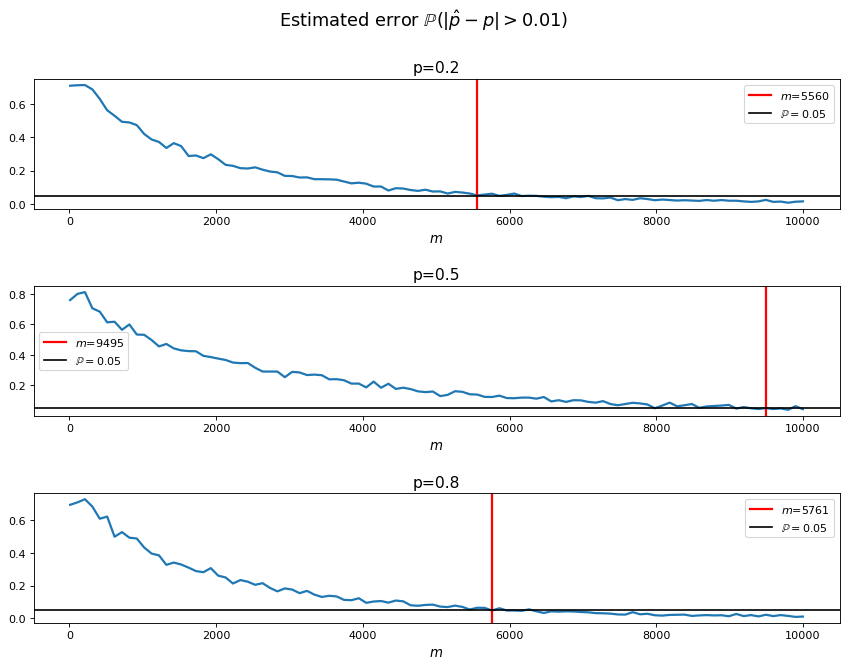

In [176]:
fig = plt.figure(figsize=(13, 9), dpi=80)
plt.suptitle('Estimated error $\mathbb{P}(|\hat{p}-p| > 0.01)$', fontsize=16)
for i, p in enumerate(tab_p):
    plt.subplot(3, 1, i+1)
    plt.title(f'p={p}', fontsize=14)
    plt.xlabel('$m$', fontsize=12)
    plt.plot(tab_m, p_res[i], linewidth=2)
    plt.axvline(tab_m[idx_nearest[i]], linewidth=2, color='r', label=f'$m$={int(tab_m[idx_nearest[i]])}')
    plt.axhline(0.05, color='k', label='$\mathbb{P}=0.05$')
    plt.legend()
    fig.subplots_adjust(hspace=0.6)

Using $m^*=18445$ will give as a theoretical error of $5\%$. However, these graphs do not support this statement. We see that for $p=0.2$ and $p=0.8$, the desired error is obtained at $m\approx5600-5700$ while for $p=0.5$, the error is obtained at $m\approx9500$, very similar to the results we got earlier in the task.

Of course, in all three cases the error estimate is decreasing, which is logical since we have more and more samples to estimate from.